In [1]:
import json
import torchaudio
import pandas as pd
from pyannote.audio import Pipeline
from typing import Dict, Tuple, List
from pyannote.core.annotation import Annotation

torchvision is not available - cannot save figures


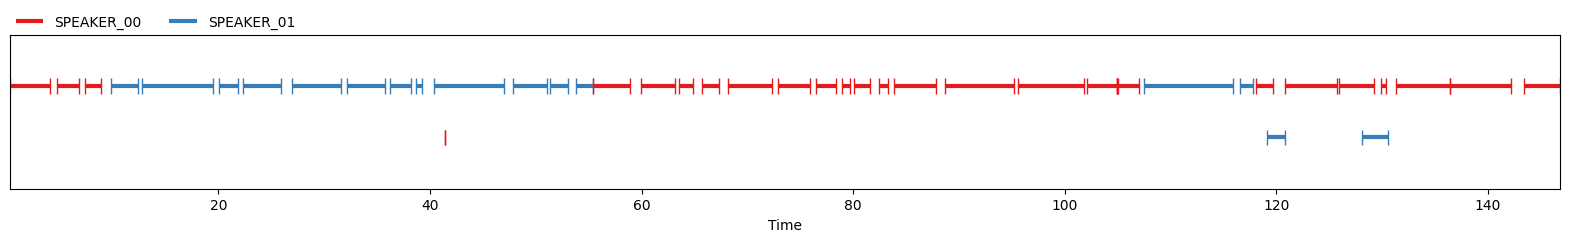

In [2]:
HF_acces_token = ''
pipeline = Pipeline.from_pretrained("pyannote/speaker-diarization-3.1",
                                     use_auth_token="HF_acces_token")

waveform, sample_rate = torchaudio.load("../../files/raw.wav")
diarization = pipeline({"waveform": waveform, "sample_rate": sample_rate}, num_speakers=2)
diarization

In [3]:
def split_diarization(diarization: Annotation) -> Dict[str, List[Tuple[float, float]]]:
    speakers_dict = {}
    current_speaker = ''
    values = Tuple[float, float]

    for turn, _, speaker in diarization.itertracks(yield_label=True):
        current_speaker = 'speaker_{:03d}'.format(int(speaker.split('_')[1]))
        values = (turn.start, turn.end)
        if speakers_dict.get(current_speaker) is None:
            speakers_dict[current_speaker] = list()
        speakers_dict[current_speaker].append(values)

    return speakers_dict
speakers = split_diarization(diarization)
speakers

{'speaker_000': [(0.30096875, 4.097843750000001),
  (4.705343750000001, 6.865343750000001),
  (7.371593750000001, 8.907218750000002),
  (41.391593750000006, 41.45909375),
  (55.44846875, 58.94159375),
  (59.970968750000004, 63.143468750000004),
  (63.51471875000001, 64.86471875000001),
  (65.74221875, 67.36221875000001),
  (68.13846875, 72.35721875),
  (72.86346875000001, 75.93471875),
  (76.47471875000001, 78.36471875000001),
  (78.92159375, 79.66409375),
  (80.08596875, 81.60471875),
  (82.44846875, 83.29221875),
  (83.88284375, 87.84846875000001),
  (88.70909375000001, 95.15534375),
  (95.61096875000001, 101.82096875),
  (102.12471875, 104.89221875000001),
  (104.92596875000001, 104.95971875000001),
  (104.99346875, 107.05221875000001),
  (118.10534375, 119.69159375000001),
  (120.78846875, 125.71596875),
  (125.90159375, 129.19221875),
  (129.90096875, 130.39034375),
  (131.33534375000002, 136.39784375000002),
  (136.41471875000002, 142.13534375),
  (143.45159375, 146.80971875)],
 

In [5]:
df = pd.DataFrame(columns=['speaker', 'start', 'end'])
for speaker, lines in zip(speakers.keys(), speakers.values()):
    for line in lines:
        df.loc[len(df)] = [speaker, line[0], line[1]]
df

,speaker,start,end
0,speaker_000,0.300969,8.907219
1,speaker_000,41.391594,41.459094
2,speaker_000,55.448469,107.052219
3,speaker_000,118.105344,119.691594
4,speaker_000,120.788469,129.192219
5,speaker_000,129.900969,146.809719
6,speaker_001,9.818469,46.994094
7,speaker_001,47.837844,55.448469
8,speaker_001,107.457219,117.767844
9,speaker_001,119.134719,120.788469


In [12]:
speakers_str = json.dumps(speakers)
speakers_str

'{"speaker_000": [[0.30096875, 8.907218750000002], [41.391593750000006, 41.45909375], [55.44846875, 107.05221875000001], [118.10534375, 119.69159375000001], [120.78846875, 129.19221875], [129.90096875, 146.80971875]], "speaker_001": [[9.818468750000001, 46.994093750000005], [47.837843750000005, 55.44846875], [107.45721875000001, 117.76784375000001], [119.13471875, 120.78846875], [128.11221875, 130.54221875000002]]}'

In [11]:
speakers_2 = json.loads(speakers_str)
type(speakers_2)

dict

In [24]:
def printing(to_print: str):
    print(to_print)

In [30]:
for speaker, lines in zip(speakers.keys(), speakers.values()):
    print('Iteration: ', i)
    printing(speaker)
    printing(lines)

In [73]:
for speaker, lines in zip(speakers_2.keys(), speakers_2.values()):
    print(speaker)
    df = pd.DataFrame(lines, columns=['start', 'end'])
    print(df)

In [74]:
lines = speakers_2['speaker_000']
lines

In [75]:
for i in range(len(lines)):
    video_emotions = {}
    part_name = 'part_{:05d}'.format(i)
    start_time = lines[i][0]
    end_time = lines[i][1]
    print('Start time: ', start_time, ' End time: ', end_time)

In [12]:
speaker_0 = speaker_1 = pd.DataFrame(columns=['start', 'end'])

In [13]:
for turn, _, speaker in diarization.itertracks(yield_label=True):
    #print(f"start={turn.start:.1f}s stop={turn.end:.1f}s speaker_{speaker}")
    if speaker == "SPEAKER_00": 
        speaker_0.loc[len(speaker_0)] = [turn.start, turn.end]
    elif speaker == "SPEAKER_01":
        speaker_1.loc[len(speaker_1)] = [turn.start, turn.end]

In [5]:
with open("./audio/output/audio.rttm", "w") as rttm:
    diarization.write_rttm(rttm)

In [ ]:
# apply pretrained pipeline
diarization = pipeline("audio.wav")

# print the result
for turn, _, speaker in diarization.itertracks(yield_label=True):
    print(f"start={turn.start:.1f}s stop={turn.end:.1f}s speaker_{speaker}")
# start=0.2s stop=1.5s speaker_0
# start=1.8s stop=3.9s speaker_1
# start=4.2s stop=5.7s speaker_0
# ...

In [41]:
speaker_0

In [83]:
def test (_speakers: Dict) -> bool:
    speakers = {'speaker_000': [(0.30096875, 8.907218750000002),
                                (41.391593750000006, 41.45909375),
                                (55.44846875, 107.05221875000001),
                                (118.10534375, 119.69159375000001),
                                (120.78846875, 129.19221875),
                                (129.90096875, 146.80971875)],
                'speaker_001': [(9.818468750000001, 46.994093750000005),
                                (47.837843750000005, 55.44846875),
                                (107.45721875000001, 117.76784375000001),
                                (119.13471875, 120.78846875),
                                (128.11221875, 130.54221875000002)]
                }

    return _speakers == speakers

In [82]:
test_dict = {'speaker_000': [(0.30096875, 8.907218750000002),
  (41.391593750000006, 41.45909375),
  (55.44846875, 107.05221875000001),
  (118.10534375, 119.69159375000001),
  (120.78846875, 129.19221875),
  (129.90096875, 146.80971875)],
 'speaker_001': [(9.818468750000001, 46.994093750000005),
  (47.837843750000005, 55.44846875),
  (107.45721875000001, 117.76784375000001),
  (119.13471875, 120.78846875),
  (128.11221875, 130.54221875000002)]}

In [84]:
test(test_dict)